# Secretrum #


## Iterativo ##


In [6]:
def decrypt(value, cont = 0):
    """Decrypt iteratiu """
    num = int(value)
    while num > 9:  #Bucle Externo
        aux = num
        sumatori = 0
        while aux:  #Bucle Interno
            sumatori += aux % 10
            aux //= 10
            cont = cont + 1 
        num = sumatori 
    return [num,cont]


In [53]:
import math
def t(n):
    if n < 9:
        return 1
    else:
        return (math.ceil(math.log(n,10000000000))   ) * math.ceil(math.log(n,10) +2)  
    

In [54]:
def test(n):
    if (t(n)==decrypt(n)[1]):
        print('Test per la n={0}. e1(n) = T(n) = {1} Ok.'.format(n,t(n)))
    else:
        print('Test per la n={0}. e1(n) != T(n) => {1} != {2} Ok.'.format(n,e1(n)[1], t(n)))

Mejor caso?

$ \Omega ? $  
Vemos que depende del numero de digitos de **value**
Como casi todas las operaciones en el bucle externo son asignaciones, tinene distintos costes $ Cx $ que podemos obviar, lo mismo con la conversión a int antes del bucle externo.

En el mejor caso, num < 10, no tenemos que iterar repetidas veces en el bucle externo ni internos, asi que podríamos resumirlo a:

$$ \Omega  = 1 * Operacions Fuera del Bucle Externo $$

Esto, sin duda, resultara en coste que solo dependera de los costes individuales de cada 


**Resolució**

| Línia | Cost | Iteracions |
|-------|------|------------|
| 1     | $c1$ |      1     |
| 2     | $c2$ |      1     |
| 3     | $c3$ |      0     |
| 4     | $c4$ |      0     |
| 5     | $c5$ |      0     |
| 6     | $c6$ |      0     |
| 7     | $c7$ |      0     |
| 8     | $c8$ |      0     |
| 9     | $c9$ |      1     |

Cost:
$$T(n) = c1 + c2  + c9 $$

Vemos entonces, que al solo depender de costes fijos, podemos decir:
$$\Omega(c)$$

Peor Caso:
$$ \Theta ? $$

Todos los digitos seran 9(para hacer las sumas mas grandes posibles), y tendremos n digitos

Valor : Paràmetro value en la función decrypt
Iteraciones: Cuantas veces se ejecuta el bucle Externo
Pasos: Pequeño comentario de que va pasando en cada iteracion

| Valor(n)          | Iteracions | Pasos                         |
|-------------------|------------|-------------------------------|
| 99                | 2          |  99 -> 18 -> 9                |
| 999               | 2          |  999 -> 27 -> 9               |
| 9999              | 2          |  9999 -> 36 -> 9              |
| 9999999999        | 2          |  9999999999 -> 90 -> 9        |
| 99999999999       | 3          |  99999999999 -> 99 -> 18 ->9  |

Esto es, cada 11 nuevos digitos añadidos, hacemos una una iteración mas por el bucle exterior
$$ \left \lceil{\log_{10000000000}n +2 }\right \rceil  $$

Esto, es tan solo para el bucle externo, el bucle interno, es mas sencillo de calcular, siendo las iteraciones del mismo:
$$ T(n) = \log n $$

Como ambos estan anidados, multiplicamos y obtenemos (Depreciando asignaciones internas, que solo aumentan la constante que acompaña a n):
$$ \log_{10000000000} n  * \log n  $$




In [55]:
import random
import math
#n = [99,999,9999,99999,999999,99999999999]
n = [10,100,1000,10000,100000,10000000000]
steps_experimental=[0,0,0,0,0,0]
steps_teoric=[0,0,0,0,0,0]
steps_log=[0,0,0,0,0,0]


for i in range(len(n)):
    steps_teoric[i] = t(n[i])
    steps_experimental[i] = decrypt(n[i])[1]
 
    for j in range(math.ceil(math.log(n[i]))):
             steps_log[i] = steps_log[i] +1 
                      

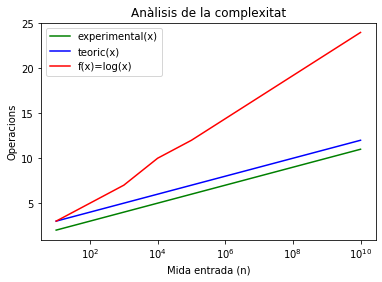

In [56]:


import matplotlib.pyplot as plt
import numpy as np


plt.plot(n,steps_experimental, 'g',label='experimental(x)')
plt.plot(n,steps_teoric, 'b',label='teoric(x)')
plt.plot(n,steps_log, 'r', label='f(x)=log(x)')
plt.xscale('log')
plt.xlabel('Mida entrada (n)')
plt.ylabel('Operacions')
plt.title('Anàlisis de la complexitat')
plt.legend()
plt.show()

# Recursivo #

In [57]:
def suma_recursiva(value,cont = 0):
    """Suma recursiva de digits """

    auxi = int(value)
    if auxi <= 9:
        return [auxi, cont]
    ultimo_digito = auxi % 10
    resto = auxi // 10
    cont = cont + 1
    nuevo = suma_recursiva(resto,cont)
    return [ultimo_digito + nuevo[0],nuevo[1]]
    #return [ultimo_digito + suma_recursiva(resto,cont)[0],cont + ]


def decrypt_recursive(value, cont = 0):
    """Decrypt recursivo """

    aux = suma_recursiva(value,cont)
    if aux[0] <= 9:
        return aux
    return decrypt_recursive(aux[0],aux[1])

Primero, usamos suma_recursiva para obtener el valor de los digitos sumados, y volvemos a llamar a decrypt_recursive si esta suma es mayor que 9



## Mejor caso ##

Mejor caso?

$ \Omega ? $  
Vemos que depende del numero de digitos de **value**
Igual que en el caso iterativo, vemos varias asignaciones y operaciones de coste trivial tanto en decrypt_recursive como en suma_recursiva. Siguiendo la misma logica:

En el mejor caso, num < 10, solo tendremso que llamar una vez a suma_recursiva y una vez a decrypt_recursive, dependeria entonces, solo de los costes de las operaciones internas, no del parametro en si, es entonces claramente:

$$\Omega(c)$$

Donde c indica la suma del coste de cada operación de división, modulo, return, suma, etc..



## Peor Caso ##


$ \Theta ? $

Nos encontramos con el un esquema muy parecido al de la versión iterativa,suponemos n digitos, y todos ellos '9's, llamamos a la funcion suma_recursiva una vez más cada 11 digitos extras en **value**

$$ \left \lceil{\log_{10000000000}n }\right \rceil $$

Y la función **suma_recursiva**  se llama asi misma la siguienta cantidad de veces:

$$ T(n) = \log n $$ 

Toda ella, tiene un coste por sus operaciones internas ( divisiones, sumas, return's..) pero podemos obviarlos, como **suma_recursiva**, es una llamada interna de **decrypt_recursive**, volvemos a tener un coste del orden:
$$ \left \lceil{\log_{10000000000}n }\right \rceil  * \log n  $$


In [43]:
import math
def t_r(n):
    if n < 9:
        return 1
    else:
        return (math.ceil(math.log(n,10000000000))   ) * math.ceil(math.log(n,10))  
    

In [44]:
def test2(n):
    if (t_r(n)==decrypt_recursive(n)[1]):
        print('Test per la n={0}. e1(n) = T(n) = {1} Ok.'.format(n,t(n)))
    else:
        print('Test per la n={0}. e1(n) != T(n) => {1} != {2} Ok.'.format(n,e1(n)[1], t(n)))

In [47]:
import random
import math
#n = [99,999,9999,99999,999999,99999999999]
n = [10,100,1000,10000,100000,10000000000]

steps_experimental=[0,0,0,0,0,0]
steps_teoric=[0,0,0,0,0,0]
steps_log=[0,0,0,0,0,0]


for i in range(len(n)):
    steps_teoric[i] = t_r(n[i])
    steps_experimental[i] = decrypt_recursive(n[i])[1]
 
    for j in range(math.ceil(math.log(n[i]))):
             steps_log[i] = steps_log[i] +1 
                      

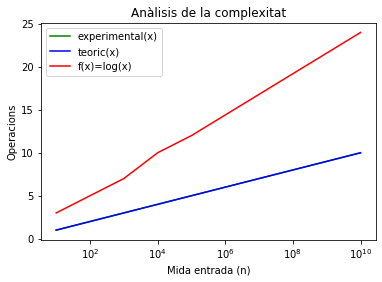

In [50]:


import matplotlib.pyplot as plt
import numpy as np


plt.plot(n,steps_experimental, 'g',label='experimental(x)')
plt.plot(n,steps_teoric, 'b',label='teoric(x)')
plt.plot(n,steps_log, 'r', label='f(x)=log(x)')
plt.xscale('log')
plt.xlabel('Mida entrada (n)')
plt.ylabel('Operacions')
plt.title('Anàlisis de la complexitat')
plt.legend()
plt.show()

Vemos que los resultados experimentales coinciden en ambas versiones, le da validez a que los teoricos tambien coincidan